##### Исходное распределение
X2 с к=5 количеством степеней свободы

THEORY MEAN= 5.0 THEORY VARIANCE= 10.0


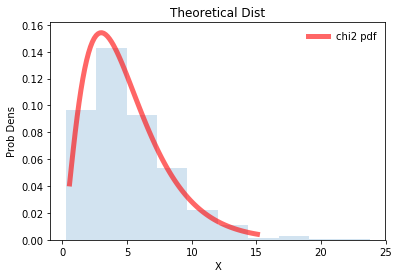

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt

# k degrees of freedom
k = 5
th_mean, th_var, _, _ = chi2.stats(k, moments='mvsk')
print("THEORY MEAN=", th_mean, "THEORY VARIANCE=", th_var)
# prob dens function
# what X is in 0.01 and 0.99 quantiles
start = chi2.ppf(0.01, k)
stop = chi2.ppf(0.99, k)
# theoretical dist
x = np.linspace(start, stop, 100)
plt.plot(x, chi2.pdf(x, k), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
# histogram
# random nums from dist
r = chi2.rvs(k, size=1000)
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
plt.legend(loc='best', frameon=False)
plt.title('Theoretical Dist')
plt.ylabel('Prob Dens')
plt.xlabel('X')
plt.show()

С помошью функции show_smean_dist(n) 
будем строить распределение среднего по гистограмме и его теоретическую оценку как нормально распределенной величины

Sample MEAN= 5.046298844356023 Sample VAR= 2.0586690755700765


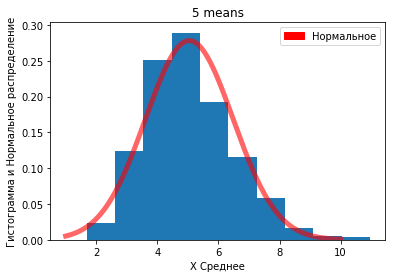

Sample MEAN= 4.979355249109338 Sample VAR= 0.19532006660700152


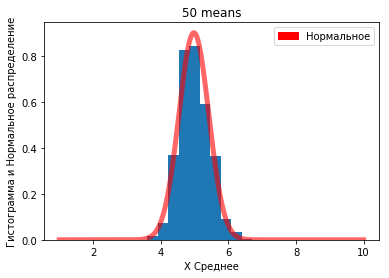

Sample MEAN= 4.998761267709534 Sample VAR= 0.009038924064553018


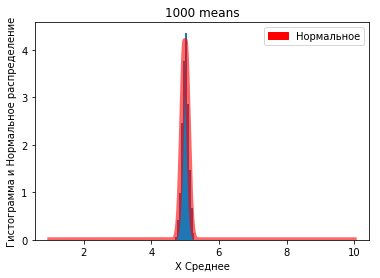

In [7]:
import matplotlib.patches as mpatches
def sample_mean(n):
    smeans = []
    for x in range(1000):
        x = chi2.rvs(k, size=n)
        smeans.append(x.mean())
    return smeans

def show_smean_dist(n):
    data = sample_mean(n)
    plt.hist(data, normed=True)
    # calculating normal dist params
    mean = np.mean(data)
    var = np.var(data)
    print("Sample MEAN=", mean, "Sample VAR=", var)
    th_norm = norm(mean, var**0.5)
    x = np.linspace(1, 10, 10000)
    plt.plot(x, th_norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
    patch = mpatches.Patch(color='red', label='Нормальное')
    plt.legend(handles=[patch])
    #
    plt.title(str(n) + ' means')
    plt.ylabel('Гистограмма и Нормальное распределение')
    plt.xlabel('X Среднее')
    plt.show()



show_smean_dist(5)
show_smean_dist(50)
show_smean_dist(1000)


# Вывод
Центральная предельная теоремма работает и распределение выборочных средних для X2 сремится к нормальному распределению.
Уменьшается дисперсия вокруг матожидания.